# Model Evaluation & Validation: Train Test Split

## Overview

<style>
    table.custom-table {
        max-width: 600px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 600px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Why is Train Test Split necessary?</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_input.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/02_output_1.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/02_output_2.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [1]:
import pandas as pd

df_passengers = pd.read_csv('../../../data/airline-passengers.csv', parse_dates=["Month"], index_col="Month")
data = df_passengers.asfreq('MS')['Passengers']
data

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 144, dtype: int64

## Previous Lesson: Overfitting Problem

1. Evaluate the model on the same data used for training.
2. Overfitting problem: the model is good to predict historical data, but not for the future.
3. Businesses depend on predicting the future, not the past.

In [2]:
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error

model = ARIMA(data, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
y_pred = model_fit.predict()
score = mean_squared_error(data[1:], y_pred[1:], squared=False)
score

c:\Users\RafaelAndreo_6gt1g09\OneDrive - BRUC ENERGY SL\Documentos\Formaciones\Analisis_modelado_sries_temporales\TS\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(12.487395460237542)

## Train Test Split: Detecting Overfitting

### Split Data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data_train, data_test = train_test_split(data, test_size=0.3, shuffle=False)

In [5]:
data_train

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1956-12-01    306
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
Freq: MS, Name: Passengers, Length: 100, dtype: int64

In [6]:
data_test

Month
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-01    340
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, dtype: int64

Month
1957-05-01    355
1957-06-01    422
             ... 
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 44, dtype: int64

<Axes: xlabel='Month'>

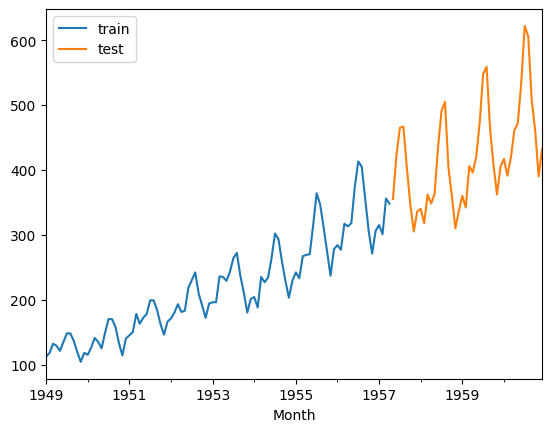

In [7]:
pd.DataFrame({'train': data_train, 'test': data_test}).plot()

### Evaluate Model on Test Data

In [8]:
model = ARIMA(data_train, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
y_pred_test = model_fit.forecast(len(data_test))
score_test = mean_squared_error(data_test, y_pred_test, squared=False)
score

c:\Users\RafaelAndreo_6gt1g09\OneDrive - BRUC ENERGY SL\Documentos\Formaciones\Analisis_modelado_sries_temporales\TS\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(12.487395460237542)

### Evaluate Model on Train Data

In [9]:
y_pred_train = model_fit.predict() 
score_train = mean_squared_error(data_train[1:], y_pred_train[1:], squared=False)
score_train

c:\Users\RafaelAndreo_6gt1g09\OneDrive - BRUC ENERGY SL\Documentos\Formaciones\Analisis_modelado_sries_temporales\TS\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(11.370285597168612)

### Visualize Overfitting

In [13]:
pd.options.plotting.backend = "plotly"

In [ ]:
data_train = data_train.rename('train')
data_test = data_test.rename('test')
y_pred_train = y_pred_train.rename('train_forecast_sarima')
y_pred_test = y_pred_test.rename('test_forecast_sarima')

df_pred = pd.concat([data_train, data_test, y_pred_train, y_pred_test], axis=1)

In [15]:
df_pred.plot(width=1000)

## [ ] Model Comparison: SARIMA vs Exponential Smoothing

### Fit the Model

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
model_es = ExponentialSmoothing(data_train, trend='add', seasonal='add', seasonal_periods=12)

In [20]:
model_es_fit = model_es.fit()

### Forecast: Calculate Predictions

In [21]:
y_pred = model_es_fit.forecast(len(data_test))

In [23]:
y_pred

1957-05-01    351.239666
1957-06-01    403.308185
1957-07-01    439.936781
1957-08-01    426.799645
1957-09-01    375.972706
1957-10-01    329.109160
1957-11-01    295.900661
1957-12-01    333.331154
1958-01-01    343.405143
1958-02-01    331.809111
1958-03-01    384.455040
1958-04-01    374.284198
1958-05-01    379.141079
1958-06-01    431.209598
1958-07-01    467.838194
1958-08-01    454.701057
1958-09-01    403.874119
1958-10-01    357.010572
1958-11-01    323.802073
1958-12-01    361.232567
1959-01-01    371.306556
1959-02-01    359.710524
1959-03-01    412.356453
1959-04-01    402.185611
1959-05-01    407.042492
1959-06-01    459.111011
1959-07-01    495.739607
1959-08-01    482.602470
1959-09-01    431.775532
1959-10-01    384.911985
1959-11-01    351.703486
1959-12-01    389.133979
1960-01-01    399.207968
1960-02-01    387.611937
1960-03-01    440.257866
1960-04-01    430.087024
1960-05-01    434.943904
1960-06-01    487.012423
1960-07-01    523.641020
1960-08-01    510.503883


In [22]:
df_pred

,train,test,train_forecast_arima,test_forecast_arima
1949-01-01,112.0,NaN,0.000000,NaN
1949-02-01,118.0,NaN,111.998670,NaN
1949-03-01,132.0,NaN,117.999763,NaN
1949-04-01,129.0,NaN,131.999657,NaN
1949-05-01,121.0,NaN,129.000048,NaN
...,...,...,...,...
1960-08-01,NaN,606.0,NaN,548.277529
1960-09-01,NaN,508.0,NaN,500.804519
1960-10-01,NaN,461.0,NaN,453.614145
1960-11-01,NaN,390.0,NaN,418.207806


In [24]:
df_pred['test_forecast_exponential'] = y_pred

In [25]:
df_pred.plot(width=1000)

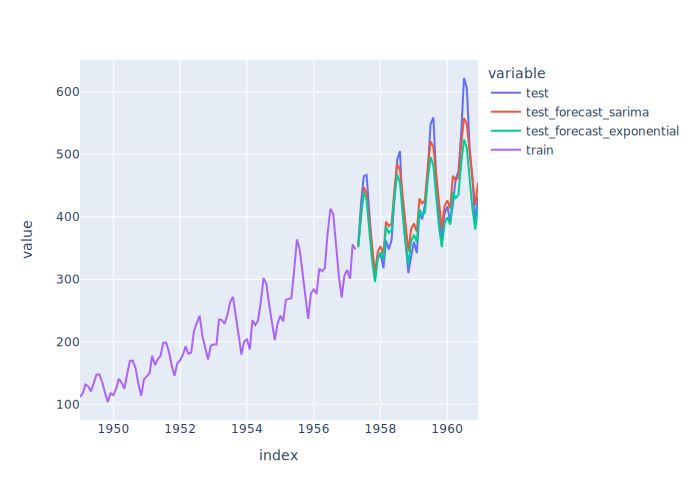

### Model's Score: Predictions vs. Reality

In [ ]:
df_pred_test = df_pred[['test', 'test_forecast_sarima', 'test_forecast_exponential']].dropna()

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_pred_test.test, df_pred_test.test_forecast_exponential, squared=False)

c:\Users\RafaelAndreo_6gt1g09\OneDrive - BRUC ENERGY SL\Documentos\Formaciones\Analisis_modelado_sries_temporales\TS\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



np.float64(33.62925953144303)

In [ ]:
mean_squared_error(df_pred_test.test, df_pred_test.test_forecast_sarima, squared=False)

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



25.911990997475304